# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [78]:
from itertools import product, combinations
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
# эмпирическая функция распределения случайной величины
from statsmodels.distributions.empirical_distribution import ECDF

In [7]:
n = 100000 # количество экспериментов для всех задач

In [8]:
outcomes1 = np.random.randint(0, 2, size=n)
outcomes2 = np.random.randint(0, 2, size=n)
result = (outcomes1 != outcomes2).sum() / n
print(f'Вероятность того, что монеты выпали разными сторонами: {result}')

Вероятность того, что монеты выпали разными сторонами: 0.49917


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [18]:
coin1 = np.random.randint(0, 2, size=n) # 1 - орел(герб), 0 - решка
coin2 = np.random.randint(0, 2, size=n)
coin3 = np.random.randint(0, 2, size=n)
print(f'Всего элементарных исходов - {2**3}, вероятность элементарного  исхода - {1/8}')
df2 = pd.DataFrame(zip(coin1, coin2, coin3))

Всего элементарных исходов - 8, вероятность элементарного  исхода - 0.125


In [19]:
A = np.sum(df2.sum(axis=1) == 3) / n
print(f'Вероятность того, что не выпало ни одного герба - {A:.4f}')

B = A + np.sum(df2.sum(axis=1) == 1) / n #четное число гербов это 0 и 2
print(f'Вероятность того, что выпало четное число гербов (0, 2) - {B:.4f}')

C = np.sum(df2[2] == 0) / n
print(f'Вероятность того, что на третьей монете выпал герб - {C:.4f}')

Вероятность того, что не выпало ни одного герба - 0.1249
Вероятность того, что выпало четное число гербов (0, 2) - 0.4980
Вероятность того, что на третьей монете выпал герб - 0.5037


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [20]:
elements = ['E', 'L', 0]
probs = [1/3, 1/3, 1/3]
member1 = np.random.choice(elements, p=probs, size=n)
member2 = np.random.choice(elements, p=probs, size=n)
member3 = np.random.choice(elements, p=probs, size=n)
df3 = pd.DataFrame(zip(member1, member2, member3))

In [21]:
A3 = np.sum((df3 == 'L').sum(axis=1) > 1) / n
print(f'Вероятность того, что рекомендован кандидат L - {A3:.4f}')

B3 = np.sum((df3 == 'E').sum(axis=1) > 1) / n
print(f'Вероятность того, что рекомендован кандидат E - {B3:.4f}')

print(f'\nВ обоих случаях теоритическая вероятность = {7/27:.4f}')

Вероятность того, что рекомендован кандидат L - 0.2595
Вероятность того, что рекомендован кандидат E - 0.2602

В обоих случаях теоритическая вероятность = 0.2593


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [22]:
dice1 = np.random.randint(1, 7, size=n)
dice2 = np.random.randint(1, 7, size=n)
df4 = pd.DataFrame(zip(dice1, dice2))
print(f'Всего элементарных исходов - {6**2}, вероятность элементарного  исхода - {1/36:.4f}')

Всего элементарных исходов - 36, вероятность элементарного  исхода - 0.0278


In [23]:
A4 = np.sum((df4 == 6).sum(axis=1) == 2) / n
print(f'Вероятность того, что вышло две "шестерки" - {A4:.4f}')

B4 = np.sum(df4.sum(axis=1) > 10) / n
print(f'Вероятность того, что сумма выпавших очков не меньше 11 - {B4:.4f}')

C4 = np.sum((df4 == 6).sum(axis=1) == 0) / n
print(f'Вероятность того, что не выпала ни одна "шестерка" - {C4:.4f}')

Вероятность того, что вышло две "шестерки" - 0.0283
Вероятность того, что сумма выпавших очков не меньше 11 - 0.0832
Вероятность того, что не выпала ни одна "шестерка" - 0.6945


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [24]:
D5 = np.sum((df4 == 6).sum(axis=1) > 0) / n
print(f'Вероятность того, что выпала хотя бы одна шестёрка - {D5:.4f}')

Вероятность того, что выпала хотя бы одна шестёрка - 0.3055


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [25]:
digit1 = np.random.randint(0, 10, size = n)
digit2 = np.random.randint(0, 10, size = n)
digit3 = np.random.randint(0, 10, size = n)
df6 = pd.DataFrame(zip(digit1, digit2, digit3))

A6 = np.sum((df6[0] != df6[1]) & (df6[1] != df6[2]) & (df6[0] != df6[2])) / n
df6['A6'] = (df6[0] != df6[1]) & (df6[1] != df6[2]) & (df6[0] != df6[2])
print(f'Вероятность, что среди стершихся все три различные цифры - {A6:.4f}')
# ------------------------------------------------------------------------------
B6 = np.sum((df6[0] == df6[1]) & (df6[1] == df6[2])) / n
df6['B6'] = (df6[0] == df6[1]) & (df6[1] == df6[2])
print(f'Вероятность, что среди стершихся все три одинаковые цифры - {B6:.4f}')
# ------------------------------------------------------------------------------
C6  = np.sum((df6[0] == df6[1]) | (df6[0] == df6[2]) | (df6[1] == df6[2])) / n
df6['C6'] = (df6[0] == df6[1]) | (df6[0] == df6[2]) | (df6[1] == df6[2])
print(f'Вероятность, что среди стершихся цифр хотя бы две совпадают - {C6:.4f}')
# ------------------------------------------------------------------------------
D6 = np.sum((df6[0] != df6[1]) | (df6[0] != df6[2]) | (df6[1] != df6[2])) / n
df6['D6'] = (df6[0] != df6[1]) | (df6[0] != df6[2]) | (df6[1] != df6[2])
print(f'Вероятность, что среди стершихся цифр хотя бы две различны - {D6:.4f}')

Вероятность, что среди стершихся все три различные цифры - 0.7208
Вероятность, что среди стершихся все три одинаковые цифры - 0.0094
Вероятность, что среди стершихся цифр хотя бы две совпадают - 0.2792
Вероятность, что среди стершихся цифр хотя бы две различны - 0.9906


In [28]:
df6.sample(5)

,0,1,2,A6,B6,C6,D6
6748,4,3,7,True,False,False,True
20512,2,8,5,True,False,False,True
53922,1,0,6,True,False,False,True
33418,5,7,7,False,False,True,True
62445,7,9,8,True,False,False,True


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

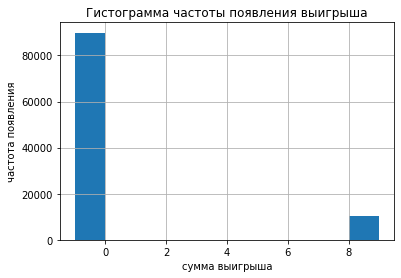

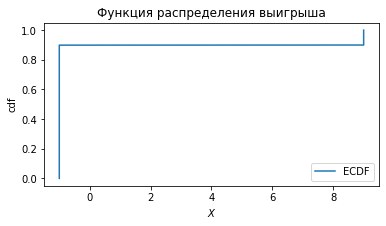

In [81]:
tickets = [-1]*9 + [9] # создаем массив с суммами

X7 = np.random.choice(tickets, size=n) # n-раз вытаскиваем билет
df7 = pd.DataFrame(X7)
df7.hist()
plt.title('Гистограмма частоты появления выигрыша')
plt.xlabel('сумма выигрыша')
plt.ylabel('частота появления')
plt.show()

ecdf7 = ECDF(X7) 


plt.figure(figsize=(6, 3))
plt.plot(ecdf7.x, ecdf7.y, label='ECDF')
plt.title('Функция распределения выигрыша')
plt.ylabel('cdf')
plt.xlabel('$X$')
plt.legend(loc='lower right')

plt.show()

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

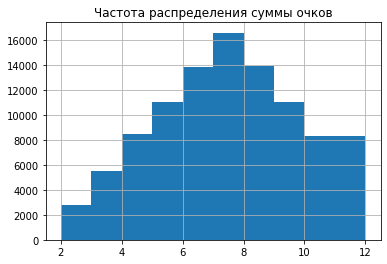

Text(0.5, 0, '$X$')

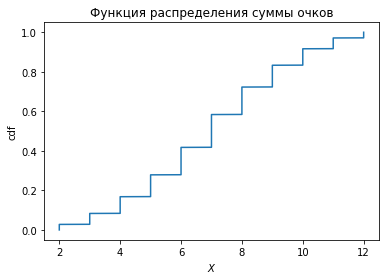

In [88]:
dice1 = np.random.randint(1, 7, size=n)
dice2 = np.random.randint(1, 7, size=n)
X8 = dice1 + dice2
pd.DataFrame(X8).hist()
plt.title('Частота распределения суммы очков')
plt.show()

ecdf8 = ECDF(X8)
plt.plot(ecdf8.x, ecdf8.y, label='ECDF')
plt.title('Функция распределения суммы очков')
plt.ylabel('cdf')
plt.xlabel('$X$')

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [89]:
suits = 'cdhs' # масти
ranks = '6789TJQKA' # ранги

# создаем колоду из 36 карт
deck = [''.join(card) for card in product(ranks, suits)]

# выбираем 2 карты без возвращения n раз
# медленный способ, пришлось использовать цикл :-(
df9 = pd.DataFrame(np.random.choice(deck, 2, replace=False) for _ in range(n))

# для упрощения фильтрации датафрейма разобьем карту на масть и ранг
df9['card1_rank'], df9['card1_suit'] = df9[0].str[0], df9[0].str[1]
df9['card2_rank'], df9['card2_suit'] = df9[1].str[0], df9[1].str[1]

cond1 = (df9['card1_rank'] == '6') # условие, что первой картой была шестерка
cond2 = (df9['card2_rank'] == '7') # условие, что второй картой была семерка
cond3 = (df9['card1_suit'] == 'd') & (df9['card2_suit'] == 'd') # условие, что обе карты бубновой масти

A9 = np.sum(cond1 & cond2) / n
print(f'Вероятность того, что первой картой была шестерка, а второй — семерка = {A9:.5f}')
B9 = np.sum(cond1 & cond2 & cond3) / n # A9 при условии, что обе карты бубновой масти
print(f'A9 при условии, что обе карты бубновой масти = {B9:.5f}')

Вероятность того, что первой картой была шестерка, а второй — семерка = 0.01215
A9 при условии, что обе карты бубновой масти = 0.00079


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [90]:
# моделируем урны: начальную - urn1
# и после того как вынули первый черный шар - urn2
urn1 = ['w']*2 + ['b']*3
urn2 = ['w']*3 + ['b']*2

# эксперимент1 - вытаскиваем 2 шара из урны первого типа n раз
choice1 = pd.DataFrame(map(lambda a: np.random.choice(urn1, size=2, replace=False),
                           range(n)), columns=['ball1', 'ball2'])

A10 = np.sum((choice1['ball1'] == 'w') & (choice1['ball2'] == 'w')) / n
print(f'Вероятность, что извлечены два белых шара - {A10:.4f}')

# определяем номера экспериментов, где первый шар - черный
change_balls = choice1.query('ball1 == "b"').index

# выбираем 1 шар из второй урны (с замененным шаром),
# размером равным количеству первых черных шаров в первой выборке
choice2 = pd.DataFrame(map(lambda a: np.random.choice(urn2), range(len(change_balls))), columns=['ball2'])
choice2.set_index(change_balls, inplace=True)

# заменяем второй шар из первого эксперимента, шаром из второго
# в тех экспериментах первой выборки, где первый шар - черный
choice1.loc[change_balls, 'ball2'] = choice2['ball2']

B10 = np.sum((choice1['ball1'] == 'b') & (choice1['ball2'] == 'b')) / n
print(f'Вероятность, что извлечены два черных шара - {B10:.4f}')

Вероятность, что извлечены два белых шара - 0.1007
Вероятность, что извлечены два черных шара - 0.2401
